In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10

In [4]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [5]:
# Normalize pixel values (0 to 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [6]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
# 🔥 Data Augmentation: Apply transformations to prevent overfitting
datagen = ImageDataGenerator(
    rotation_range=15,  # Rotate images by 15 degrees
    width_shift_range=0.1,  # Horizontal shift
    height_shift_range=0.1,  # Vertical shift
    horizontal_flip=True  # Randomly flip images
)
datagen.fit(X_train)

In [8]:
# 🏗️ Improved CNN Model with Batch Normalization & Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),  # Normalizes activations
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Reduced overfitting

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),  # Stronger regularization

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # L2 regularization
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# ⏳ Early Stopping: Stop training if validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [11]:
# Train the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 44ms/step - accuracy: 0.2758 - loss: 2.6399 - val_accuracy: 0.4823 - val_loss: 1.7073
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.4260 - loss: 1.8560 - val_accuracy: 0.5212 - val_loss: 1.5863
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.4845 - loss: 1.6445 - val_accuracy: 0.5733 - val_loss: 1.4442
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5281 - loss: 1.5405 - val_accuracy: 0.5501 - val_loss: 1.6160
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5558 - loss: 1.5029 - val_accuracy: 0.5968 - val_loss: 1.4196
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5813 - loss: 1.4705 - val_accuracy: 0.6499 - val_loss: 1.2831
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6018 - loss: 1.4284 - val_accuracy: 0.6812 - val_loss: 1.2392
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6146 - loss: 1.3883 - val_accurac

313/313 - 1s - 3ms/step - accuracy: 0.7335 - loss: 1.0330
Test Accuracy: 0.7335


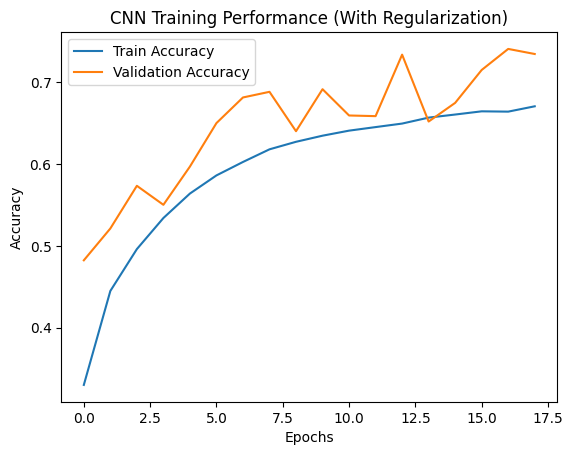

In [12]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("CNN Training Performance (With Regularization)")
plt.show()